In [ ]:
!pip install mediapipe

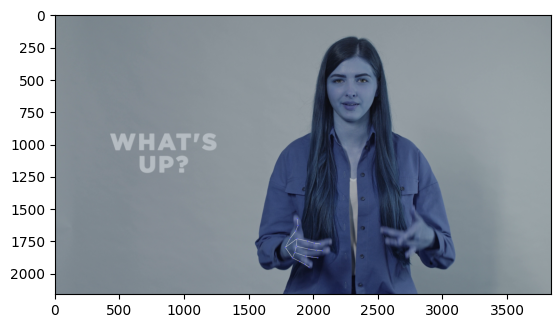

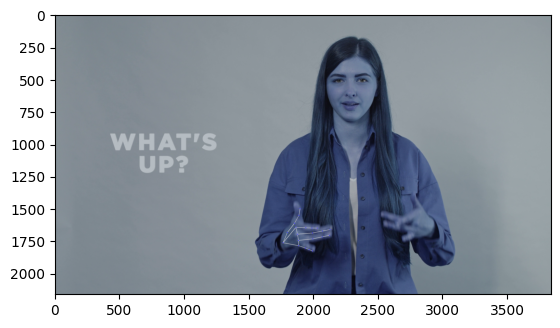

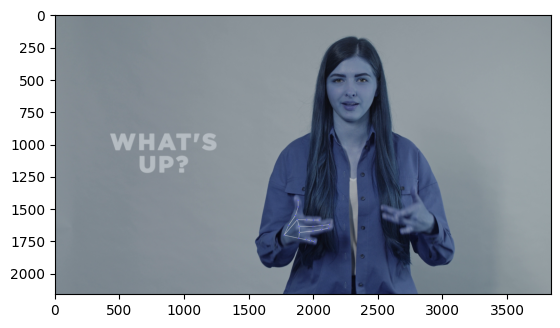

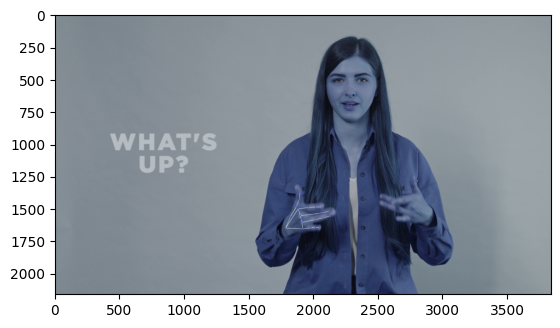

KeyboardInterrupt: 

In [24]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(static_image_mode=False,
                       max_num_hands=2,
                       min_detection_confidence=0.5,
                       min_tracking_confidence=0.5)

cap = cv2.VideoCapture('sample.mp4')
# jump to the half of this video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.set(cv2.CAP_PROP_POS_FRAMES, total_frames // 2)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(frame)

    """
    The missing results could be processed by Kalman filters.
    Different users have different gestures (mainly for different durations).
      I think this should be pre-defined.
    While streaming, short video clips might be pushed to imagebind. For
      pre-trained models or fine-tuned models.
    """

    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    plt.imshow(frame)
    plt.show()

cap.release()
cv2.destroyAllWindows()


The one with the Kalman filter.

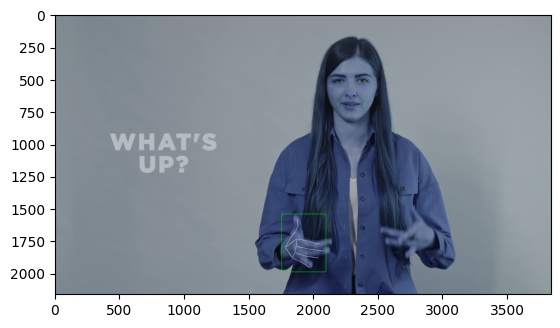

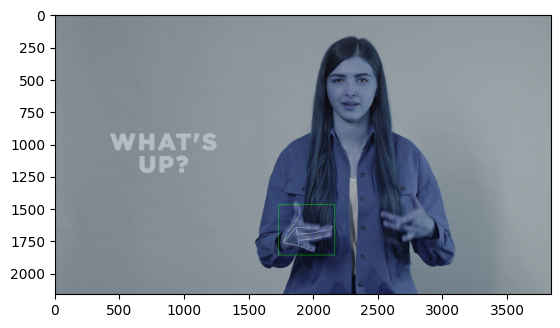

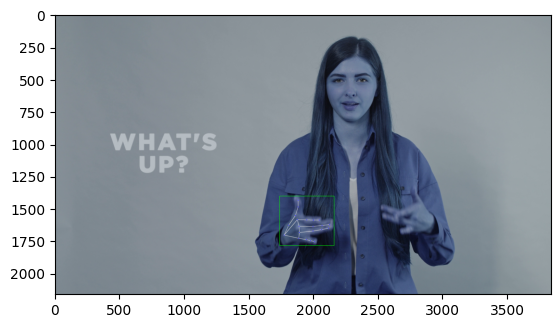

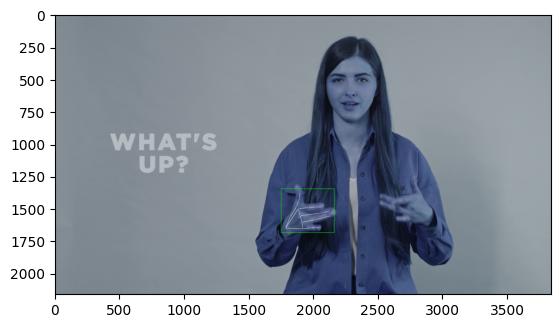

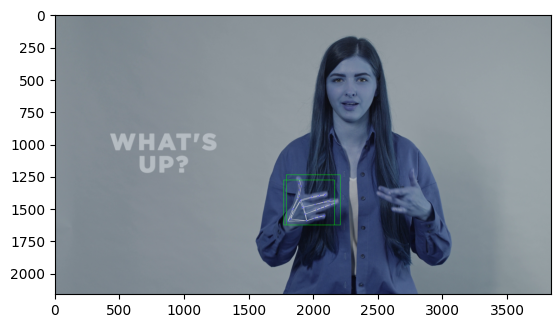

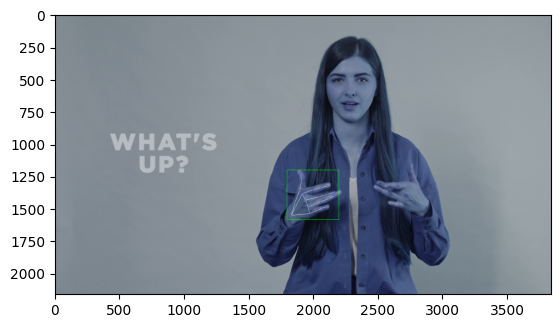

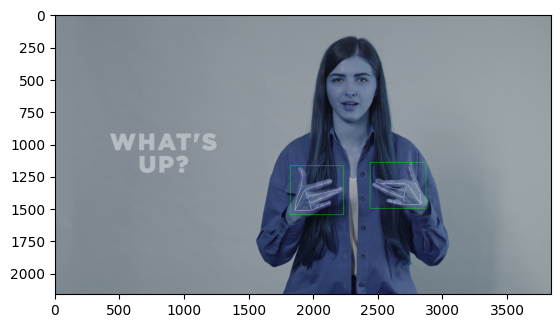

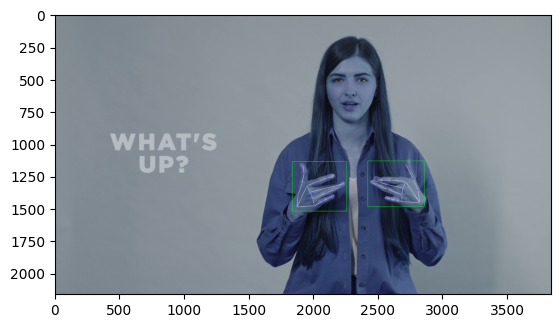

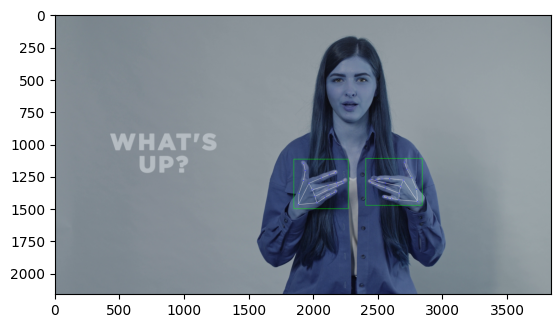

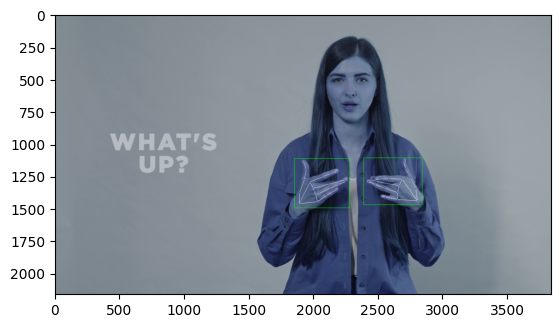

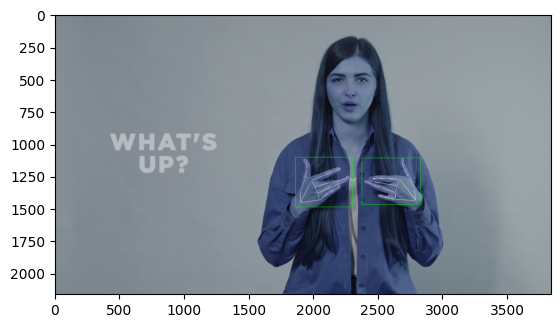

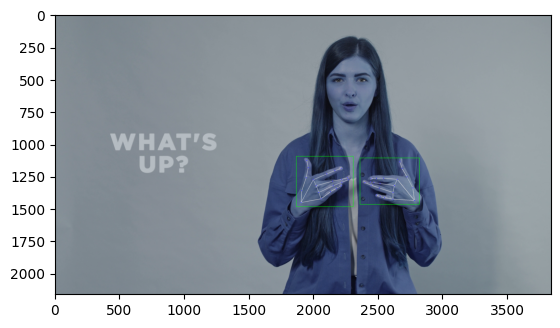

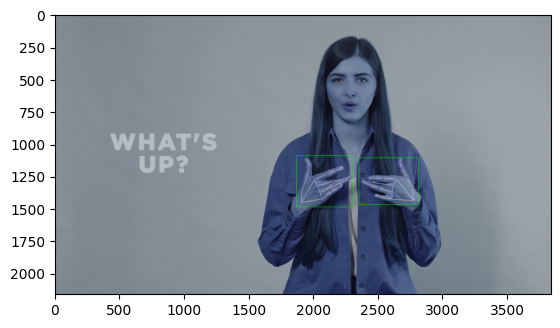

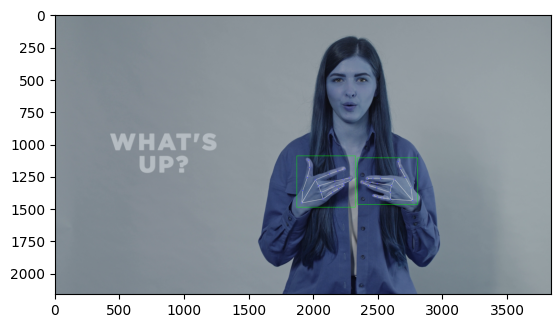

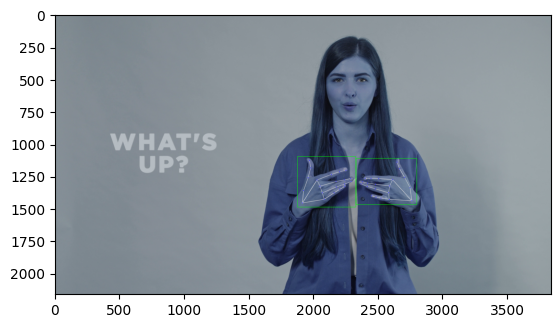

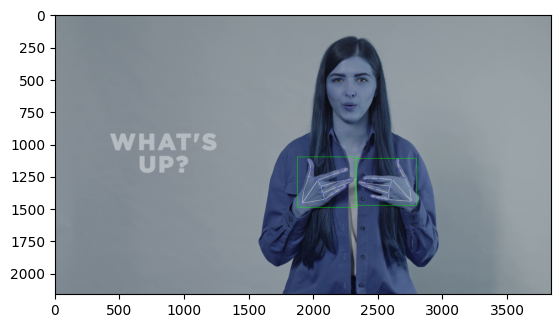

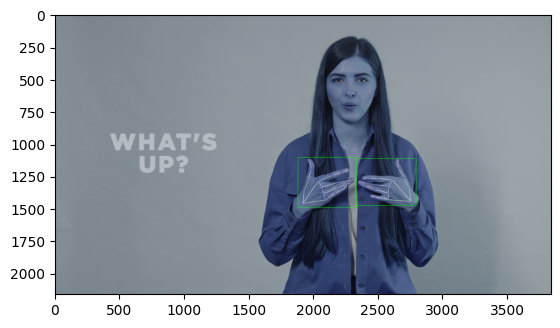

KeyboardInterrupt: 

In [27]:
import cv2
import mediapipe as mp
import numpy as np

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False,
                       max_num_hands=2,  # detect at most 2 hands
                       min_detection_confidence=0.5,
                       min_tracking_confidence=0.5)  # set the confidence here
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture('sample.mp4')

# jump to the half of this video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.set(cv2.CAP_PROP_POS_FRAMES, total_frames // 2)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # calculate bounding box
            landmark_coords = [(landmark.x, landmark.y) for landmark in hand_landmarks.landmark]
            x_coords, y_coords = zip(*landmark_coords)
            x_min, x_max = min(x_coords) * frame.shape[1], max(x_coords) * frame.shape[1]
            y_min, y_max = min(y_coords) * frame.shape[0], max(y_coords) * frame.shape[0]

            # give each bbox a margin to make sure it covers the whole hand
            padding_width = (x_max - x_min) * 0.1
            padding_height = (y_max - y_min) * 0.1
            x_min, x_max = x_min - padding_width, x_max + padding_width
            y_min, y_max = y_min - padding_height, y_max + padding_height

            # draw the bounding box
            cv2.rectangle(frame, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)

            # draw hand landmarks
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    plt.imshow(frame)
    plt.show()

cap.release()
cv2.destroyAllWindows()


storage video clips

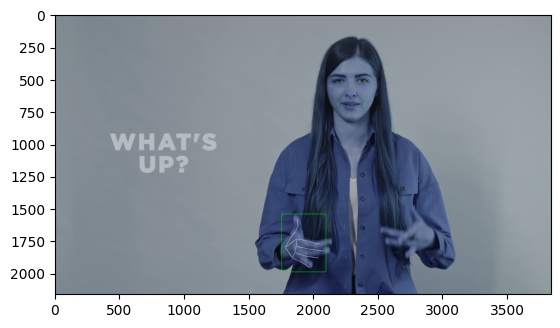

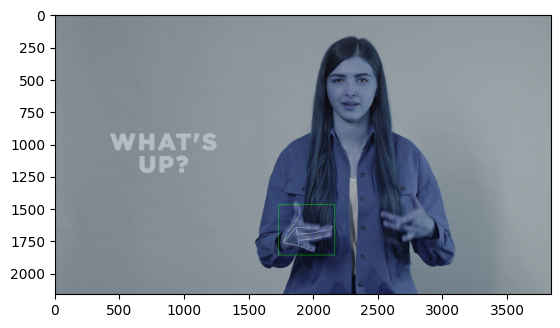

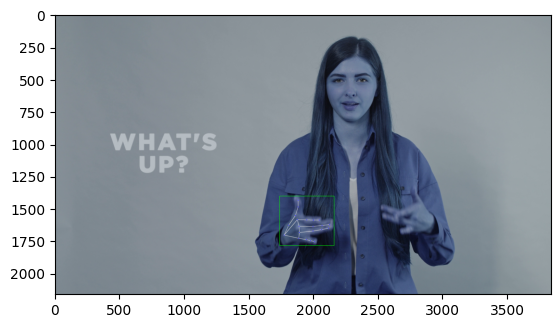

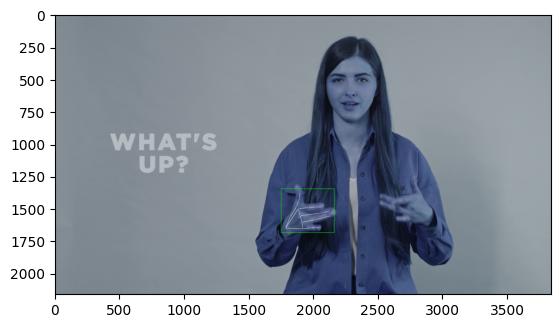

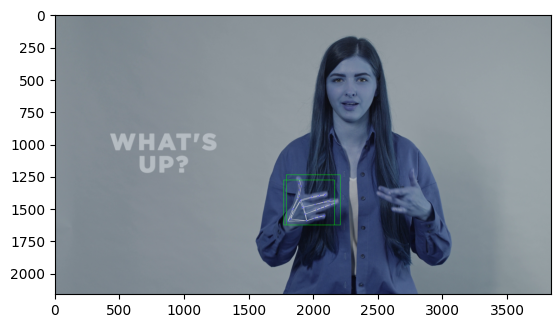

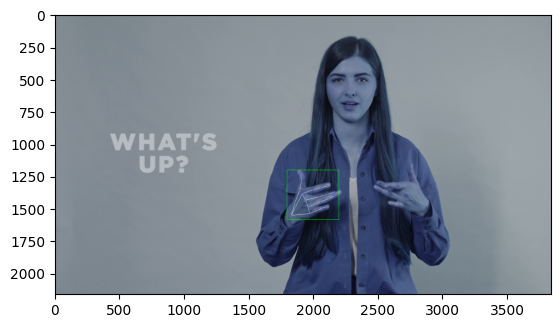

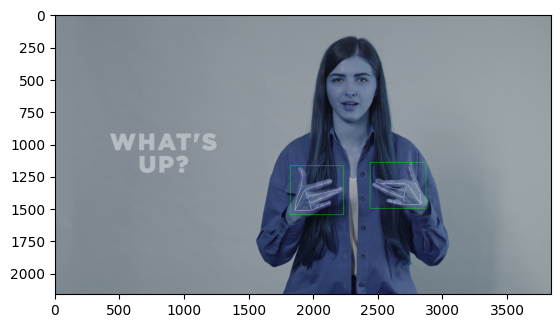

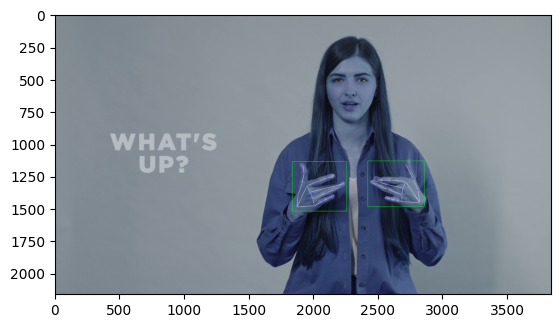

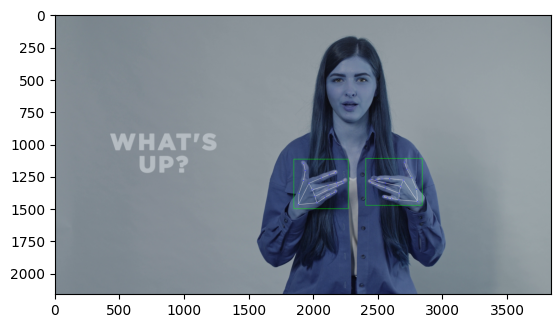

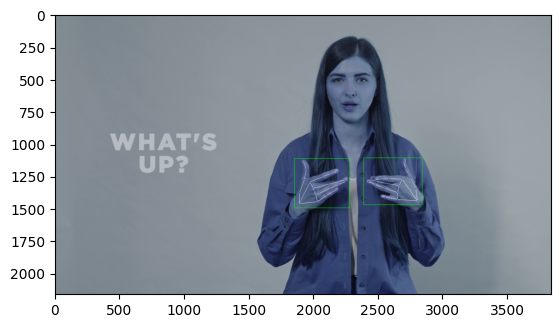

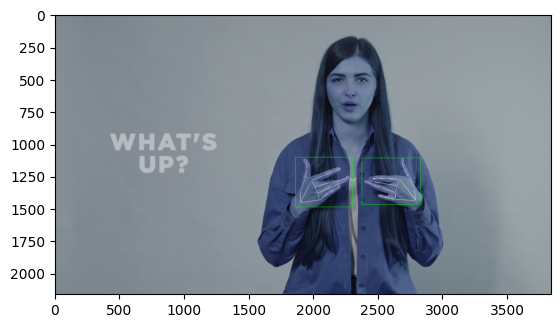

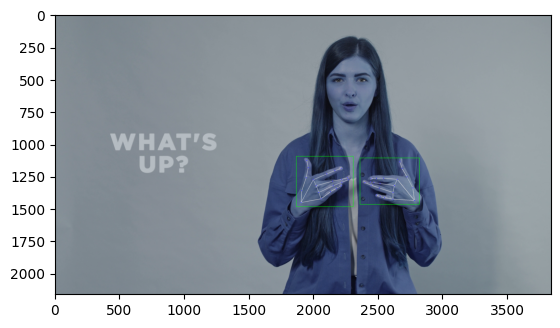

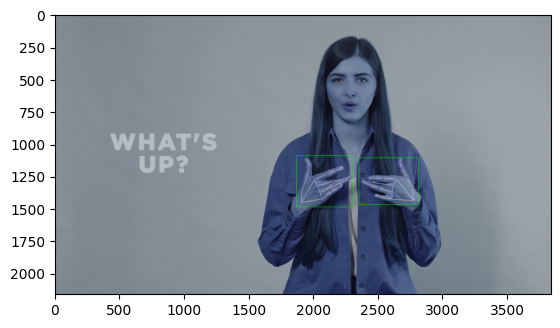

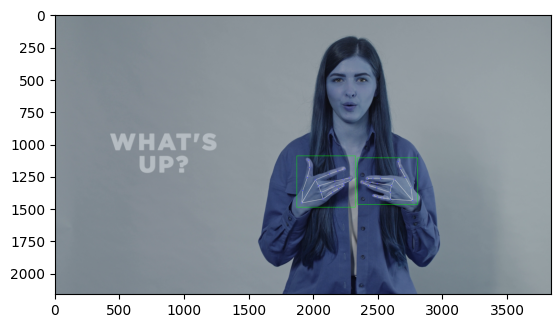

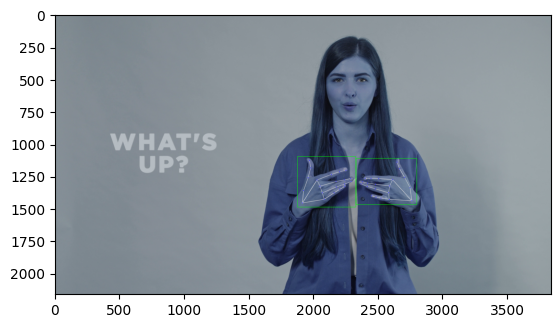

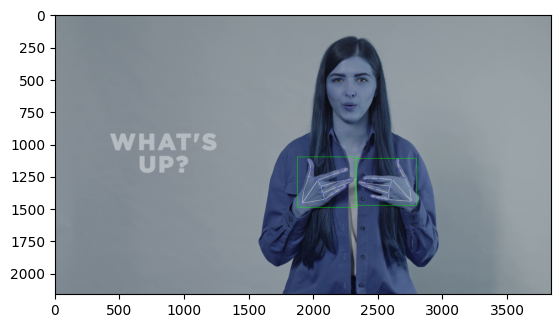

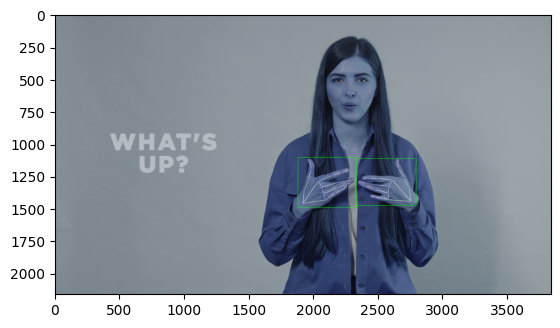

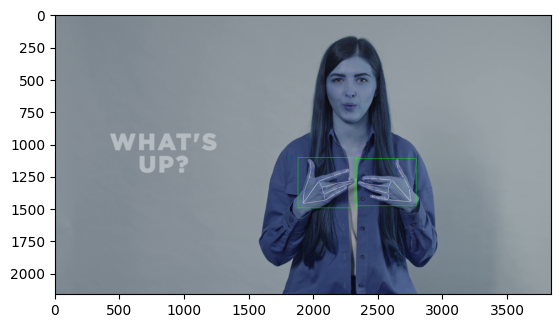

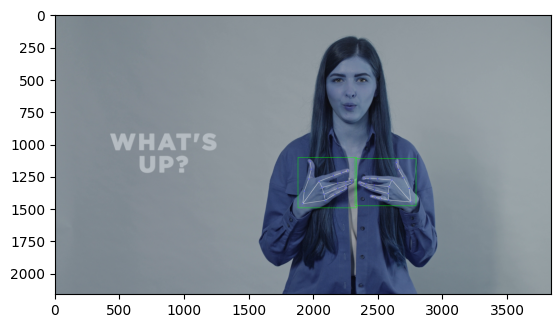

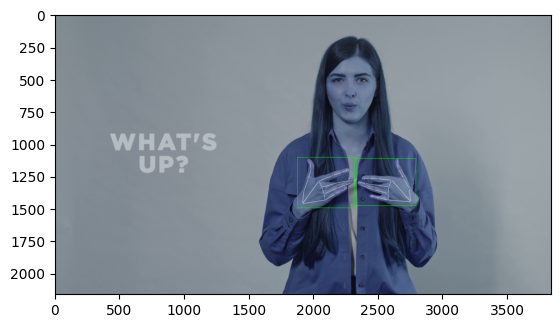

KeyboardInterrupt: 

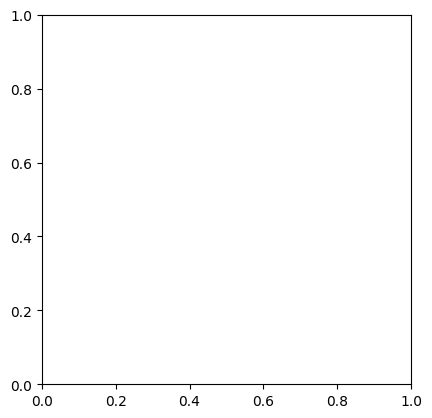

In [22]:
import cv2
import mediapipe as mp

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture('sample.mp4')
fps = int(cap.get(cv2.CAP_PROP_FPS))  # get fps
frame_count = 0  # total number of frames
save_interval = fps // 2  # save per 0.5 seconds [int]
two_seconds_frames = fps // 2  # frames in 0.5 seconds [int]

# jump to the half of this video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.set(cv2.CAP_PROP_POS_FRAMES, total_frames // 2)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(frame_rgb)

    # storage frames
    frames_to_save = []

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # calculate bounding box
            landmark_coords = [(landmark.x, landmark.y) for landmark in hand_landmarks.landmark]
            x_coords, y_coords = zip(*landmark_coords)
            x_min, x_max = min(x_coords) * frame.shape[1], max(x_coords) * frame.shape[1]
            y_min, y_max = min(y_coords) * frame.shape[0], max(y_coords) * frame.shape[0]

            # give each bbox a margin to make sure it covers the whole hand
            padding_width = (x_max - x_min) * 0.1
            padding_height = (y_max - y_min) * 0.1
            x_min, x_max = x_min - padding_width, x_max + padding_width
            y_min, y_max = y_min - padding_height, y_max + padding_height

            # draw the bounding box
            cv2.rectangle(frame, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)

            # draw hand landmarks
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            frames_to_save.append(frame)

    # save per 0.5 second
    if frame_count % save_interval == 0 and frames_to_save:
        video_writer = cv2.VideoWriter(f'output_{frame_count // save_interval}.mp4',
                                       cv2.VideoWriter_fourcc(*'XVID'),
                                       fps,
                                       (frame.shape[1], frame.shape[0]))
        for f in frames_to_save[-two_seconds_frames:]:
            video_writer.write(f)
        video_writer.release()

    frame_count += 1

    plt.imshow(frame)
    plt.show()

cap.release()
cv2.destroyAllWindows()
